In [ ]:
# Import required libraries
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Preprocessing

In [ ]:
# read the data
data = pd.read_csv('/content/insurance.csv')
data.shape

(1338, 7)

In [ ]:
data.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.dropna(how = 'any', inplace = True) # drop missing values
data.drop_duplicates(inplace = True) # drop duplicates


In [ ]:
#Feature Encoding
Label_Encoder = LabelEncoder()
data['Gender_encoded'] = Label_Encoder.fit_transform(data['sex'])
data['smoker_encoded'] = Label_Encoder.fit_transform(data['smoker'])
data['region_encoded'] = Label_Encoder.fit_transform(data['region'])

In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges,Gender_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [ ]:
# splitting the the data into independent and dependent variables
X = data.iloc[:,[0,2,3,7,8,9]]
y = data.iloc[:, 6]

In [ ]:
# Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 20 )

In [ ]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# NN model

model = Sequential()
model.add(Dense(128, input_dim = 6, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))


# output layer
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer= 'adam', metrics = ['mae'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               896       
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
27/27 [==============================] - 1s 10ms/step - loss: 318189888.0000 - mae: 13171.0635 - val_loss: 331542272.0000 - val_mae: 13505.0645
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 316695328.0000 - mae: 13123.6992 - val_loss: 328015712.0000 - val_mae: 13398.3232
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 309309888.0000 - mae: 12894.9238 - val_loss: 313015584.0000 - val_mae: 12963.7969
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 284270496.0000 - mae: 12140.6846 - val_loss: 270218624.0000 - val_mae: 11719.5957
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 227945936.0000 - mae: 10308.3086 - val_loss: 186198192.0000 - val_mae: 9104.0957
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 139180976.0000 - mae: 7381.1631 - val_loss: 87097976.0000 - val_mae: 5636.2021
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 

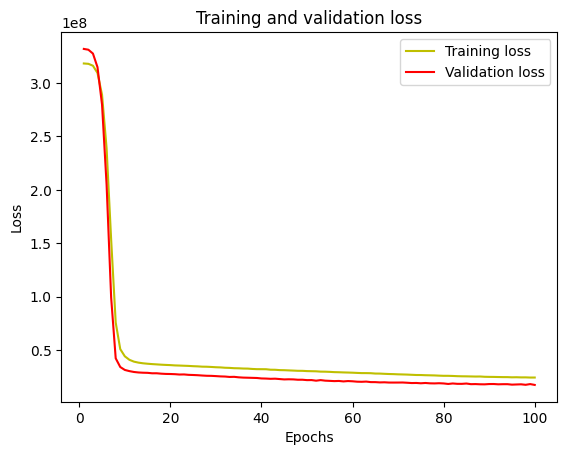

In [ ]:
# plot the train and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

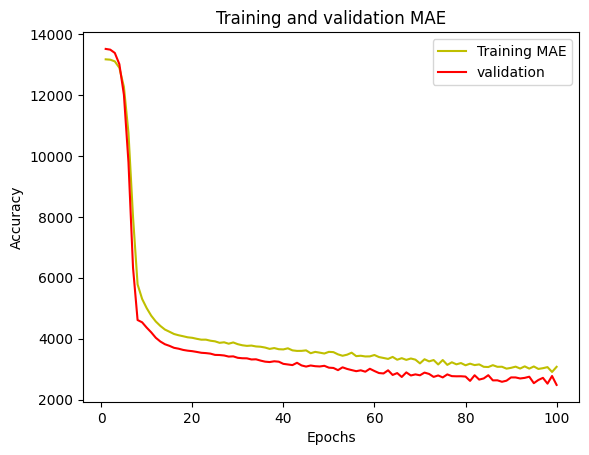

In [ ]:
# plot MAE
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs , acc, 'y', label = 'Training MAE')
plt.plot(epochs, val_acc, 'r' , label = 'validation')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()




In [ ]:
# Predict
predictions = model.predict(X_test_scaled)
# Convert the predicted values to a 1D numpy array
predicted_values = np.squeeze(predictions)
print('Predicted values are : ', predicted_values)
print('Real values are: ', y_train.values)

9/9 [==============================] - 0s 4ms/step
Predicted values are :  [ 3712.5205  4157.904  10527.208  14273.6875  3126.095   4652.784
  5918.2314  3838.5427 38675.293  13191.92   17810.414   4781.5293
  7773.8716  7191.4355  7333.8223 47245.215  11186.042   4335.316
 11807.439   7221.006   8098.032   3558.7744  7927.845   7719.637
 19182.186   9147.811  26600.402   7464.955  14407.703  10747.337
  8126.7305 12130.402  38545.387  34844.734  12043.4375  3044.325
  8607.776   5192.529   4016.3193 14786.515  23375.885   3567.212
  3507.9998  6012.9336 16139.623   8429.644  13298.177  48545.004
 29106.824  44622.082   4859.465   3103.2673 12510.42    4028.4485
 38130.504   3183.9976  7823.42   25672.111  11807.128  19308.625
 27572.998  15204.486   4003.7466 13481.939   8128.3164  7922.451
 12902.703  10103.046   9607.242   3868.768   5731.3013 37050.332
  9095.195  13010.945  14716.672   5290.7505 10312.2705 39643.09
 11479.656  43172.29    5712.6895 11954.672  53532.613  10188.82
 

In [ ]:
# model evaluation
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absoulute error from neural net: ', mae_neural)

9/9 [==============================] - 0s 4ms/step - loss: 14965842.0000 - mae: 2351.1406
Mean squared error from neural net:  14965842.0
Mean absoulute error from neural net:  2351.140625


In [ ]:
# Finding performance rate using r2_score
r2_score(y_test, predictions)
print(f'Performance of the model =  { round(r2_score(y_test,predictions),4)*100}%')

Performance of the model =  89.12%


In [ ]:
#Linear Regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression : ', mse_lr)
print('Mean absolute error from linear regression : ', mae_lr)


Mean squared error from linear regression :  29948617.86453913
Mean absolute error from linear regression :  3911.841515665618


In [ ]:
# Finding performance using r2_score
r2_score(y_test,y_pred_lr)
print(f'The performance of Linear model is = {round(r2_score(y_test,y_pred_lr),4)*100}% ')

The performance of Linear model is = 80.05% 


In [ ]:
# Instantiate the DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Train the model
tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test_scaled)

# Calculate MSE and MAE
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)

# Print the results
print('Mean squared error of the tree:', mse_dt)
print('Mean absolute error of the tree:', mae_dt)


Mean squared error of the tree: 50100823.53864925
Mean absolute error of the tree: 3464.1793505186565


In [ ]:
# find the performance of the Tree
r2_score(y_test, y_pred_tree)
print(f'The performance of Decision Tree is = {round(r2_score(y_test,y_pred_tree),4)*100}%')

The performance of Decision Tree is = 66.63%


In [ ]:
# Random forest
#Increase number of trees
model = RandomForestRegressor(n_estimators = 12, random_state = 30)
model.fit(X_train_scaled, y_train)

y_pred_rf = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_rf)
mae_RF = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error using Random Forest : ', mse_RF)
print("Mean absolute error using Random Forest : ", mae_RF)


Mean squared error using Random Forest :  17830176.94088645
Mean absolute error using Random Forest :  2314.807042451182


In [ ]:
# Recheck the performance
r2_score(y_test, y_pred_rf)
print(f'The new performance of the model is = {round(r2_score(y_test,y_pred_rf),4)*100}%')

The new performance of the model is = 88.12%


In [ ]:
#Feature ranking

# Get the list of feature names
feature_list = list(X.columns)

# Get the feature importances from the trained Random Forest model
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print the sorted feature importances
print(feature_imp)



smoker_encoded    0.607003
bmi               0.216366
age               0.131691
children          0.022496
region_encoded    0.015711
Gender_encoded    0.006733
dtype: float64
